In [267]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FuncFormatter
import pandas as pd
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

In [268]:
# Import common styles
%run ../common_styles.ipynb

['#003f5c', '#7a5195', '#d63656', '#e69e19']


In [269]:
# Setting font
font_dirs = ['Cabin/']
font_files = font_manager.findSystemFonts(fontpaths = font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = FONT_STYLE

In [270]:
# Useful functions
def millions_formatter(x, pos):
    return f'{x / 1000000:.1f}'

In [271]:
df_1961 = pd.read_csv('bruno_1961.csv')
df_2019 = pd.read_csv('bruno_2019.csv')

In [272]:
#queries
query1 = """ 
select sum(Value) as Value
from df_1961
where Item in ('Cereals', 'Sugar', 'Fats and oils', 'Vegetables', 'Milk and eggs','Fruits') and   Element == 'Losses'
"""
Losses_1961= pysqldf(query1) #result in a dataframe
Losses_1961= Losses_1961.Value.tolist()
Losses_1961[0]

query2 = """ 
select sum(Value) as Value
from df_2019
where Item in ('Cereals', 'Sugar', 'Fats and oils', 'Vegetables', 'Milk and eggs','Fruits') and  Element == 'Losses'
"""
Losses_2019 = pysqldf(query2) #result in a dataframe
Losses_2019 = Losses_2019.Value.tolist()
Losses_2019[0]
####################
#queries
query3 = """ 
select sum(Value) as Value
from df_1961
where Item in ('Cereals', 'Sugar', 'Fats and oils', 'Vegetables', 'Milk and eggs','Fruits') and   Element == 'Feed'
"""
Feed_1961= pysqldf(query3) #result in a dataframe
Feed_1961= Feed_1961.Value.tolist()
Feed_1961[0]

query4 = """ 
select sum(Value) as Value
from df_2019
where Item in ('Cereals', 'Sugar', 'Fats and oils', 'Vegetables', 'Milk and eggs','Fruits') and  Element == 'Feed'
"""
Feed_2019 = pysqldf(query4) #result in a dataframe
Feed_2019 = Feed_2019.Value.tolist()
Feed_2019[0]
####################
#queries
query5 = """ 
select sum(Value) as Value
from df_1961
where Item in ('Cereals', 'Sugar', 'Fats and oils', 'Vegetables', 'Milk and eggs','Fruits') and   Element == 'Processing'
"""
Processing_1961= pysqldf(query5) #result in a dataframe
Processing_1961= Processing_1961.Value.tolist()
Processing_1961[0]

query6 = """ 
select sum(Value) as Value
from df_2019
where Item in ('Cereals', 'Sugar', 'Fats and oils', 'Vegetables', 'Milk and eggs','Fruits') and  Element == 'Processing'
"""
Processing_2019 = pysqldf(query6) #result in a dataframe
Processing_2019 = Processing_2019.Value.tolist()
Processing_2019[0]
####################
#queries
query7 = """ 
select sum(Value) as Value
from df_1961
where Item in ('Cereals', 'Sugar', 'Fats and oils', 'Vegetables', 'Milk and eggs','Fruits') and   Element == 'Food'
"""
Food_1961= pysqldf(query7) #result in a dataframe
Food_1961= Food_1961.Value.tolist()
Food_1961[0]

query8 = """ 
select sum(Value) as Value
from df_2019
where Item in ('Cereals', 'Sugar', 'Fats and oils', 'Vegetables', 'Milk and eggs','Fruits') and  Element == 'Food'
"""
Food_2019 = pysqldf(query8) #result in a dataframe
Food_2019 = Food_2019.Value.tolist()
Food_2019[0]
####################
[Feed_1961[0],Feed_2019[0],Processing_1961[0],Processing_2019[0],Losses_1961[0],Losses_2019[0],Food_1961[0],Food_2019[0]]



[414138.0,
 1208206.0,
 659441.0,
 2858724.0,
 89849.0,
 523140.0,
 1056598.0,
 4054898.0]

/var/folders/jm/66dcr8v53376nb99r_h2hskr0000gn/T/ipykernel_51100/512357475.py:14: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace = 2.5)
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
findfont: Font family 'Cabin-Regular' not found.
find

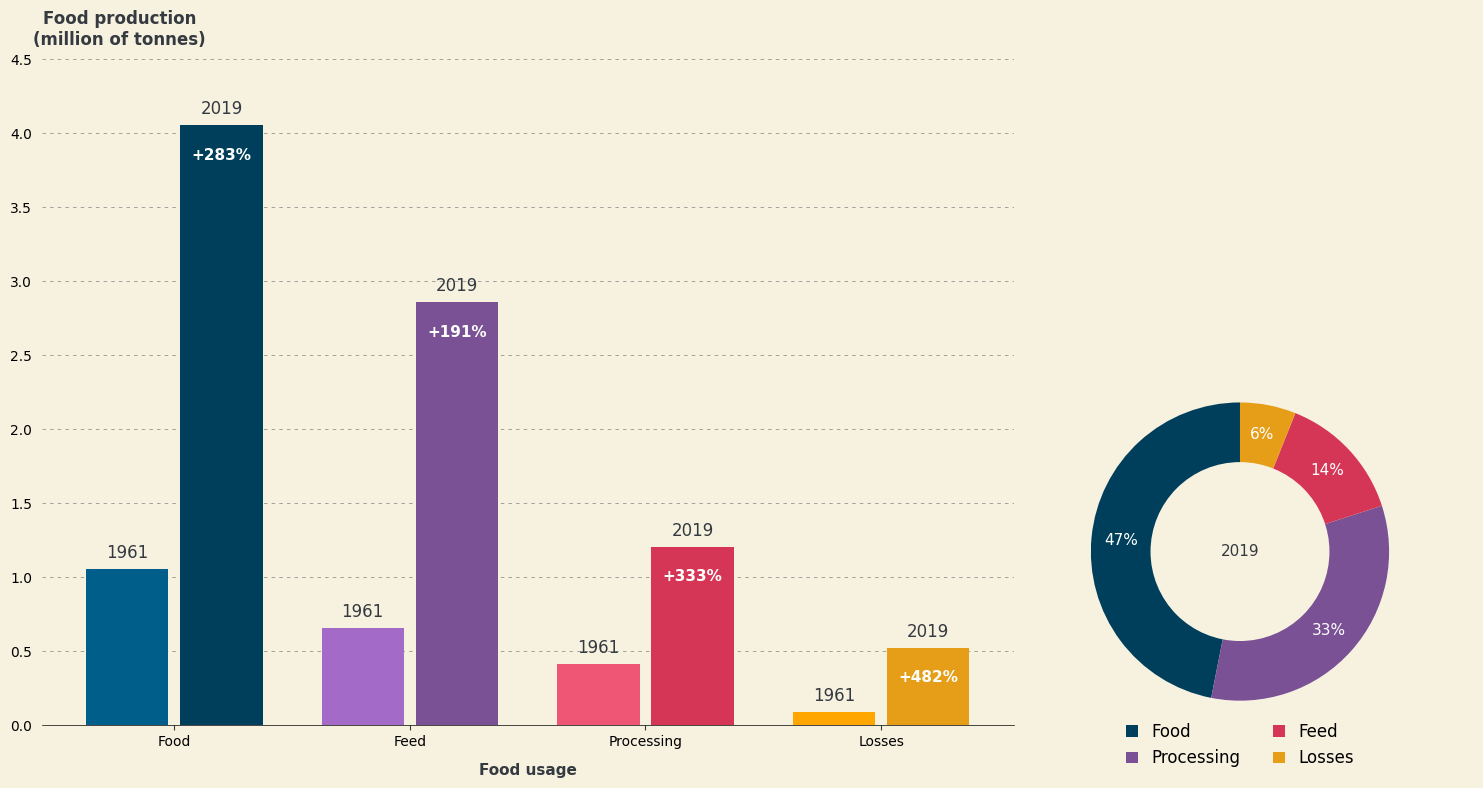

In [273]:
# SETTING UP FIGURE
fig, ax = plt.subplot_mosaic(
    [
        ['main', 'title'],
        ['main', 'pie']
    ],
    figsize = (15, 8),
    layout = "constrained",
    gridspec_kw = {'width_ratios': [3, 1]}
)
fig.patch.set_facecolor(BACKGROUND_COLOR)

#Increase space between subplots
fig.subplots_adjust(wspace = 2.5)

###############
## MAIN PLOT ##
###############

# Barplot info
labels = ['Food', 'Processing', 'Feed', 'Losses']
x = np.arange(len(labels))
width = 0.35
y1961 = [Food_1961[0], Processing_1961[0], Feed_1961[0], Losses_1961[0]]
y2019 = [Food_2019[0], Processing_2019[0], Feed_2019[0], Losses_2019[0]]

# Plot
ax['main'].bar(x - width / 2 - 0.025, y1961, color = BRUNO_COLORS, width = width)
ax['main'].bar(x + width / 2 + 0.025, y2019, color = BRUNO_COLORS_DARKER, width = width)

# X AXIS
ax['main'].set_xticks([0,1,2,3])
ax['main'].set_xticklabels(['Food', 'Feed', 'Processing', 'Losses'])
ax['main'].set_xlabel('Food usage', fontsize = LABEL_SIZE, fontweight = LABEL_WEIGHT, labelpad = LABEL_PAD, color = PRIMARY_TEXT_COLOR)

# Add annotation under the bars
for i in range(len(labels)):
    ax['main'].annotate('1961', xy=(i - width / 2 - 0.025, y1961[i] + 10000), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize = 12, color = PRIMARY_TEXT_COLOR)
    ax['main'].annotate('2019', xy=(i + width / 2 + 0.025, y2019[i] + 10000), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize = 12, color = PRIMARY_TEXT_COLOR)

# Y AXIS
ax['main'].yaxis.set_ticks_position('none')
ax['main'].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax['main'].set_yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000])
ax['main'].set_ylim([0, 4800000])

# Annotate above the plot
ax['main'].annotate('Food production\n(million of tonnes)', xy=(0.5, 0.5), xytext=(0.08, 0.98), xycoords='axes fraction', fontsize = 12, fontweight = 'bold', color = PRIMARY_TEXT_COLOR, ha='center', va='center')

# AXIS
ax['main'].spines['left'].set_linewidth(False)
ax['main'].spines['top'].set_visible(False)
ax['main'].spines['right'].set_visible(False)
ax['main'].spines['bottom'].set_linewidth(0.5)

# Change tick parameters size
ax['main'].tick_params(axis = 'both', which = 'major', labelsize = TICK_SIZE, color = PRIMARY_TEXT_COLOR)

# Grid
ax['main'].set_axisbelow(True)
ax['main'].yaxis.grid(True, color = GRID_COLOR, linestyle = '--', dashes=(5, 6), linewidth = 0.5)

# Legend
leg_1961 = mpatches.Patch(color = BAR_COLOR[0], label='1961')
leg_2019 = mpatches.Patch(color = BAR_COLOR[1], label='2019')

# Add annotation over bars
# Increase in percentage

increase = ["+283%", "+191%", "+333%", "+482%"]

for i in range(len(increase)):
    ax['main'].annotate(increase[i], xy = (x[i] + width / 2 + 0.025, y2019[i] - 200000), ha = 'center', va = 'center', fontweight = LABEL_WEIGHT, fontsize = LABEL_SIZE, color = WHITE_TEXT_COLOR)

# Background color
ax['main'].set_facecolor(BACKGROUND_COLOR) 

##################
# Pie chart 2019 #
##################

# Pie chart
labels = ['Food', 'Processing', 'Feed', 'Losses']
sizes = [Food_2019[0], Processing_2019[0], Feed_2019[0], Losses_2019[0]]
#colors
textprops = {"fontsize":15}

patches, texts, autotexts = ax['pie'].pie(sizes, colors = BRUNO_COLORS_DARKER,labels = labels, pctdistance = 0.8, autopct='%.0f%%', startangle=90, textprops=textprops)
for text in texts:
    text.set_color(BACKGROUND_COLOR)
for autotext in autotexts:
    autotext.set_color('white')

# Change font size percentage
plt.setp(autotexts, size = LABEL_SIZE)

centre_circle = plt.Circle((0, 0), 0.6, fc = BACKGROUND_COLOR)
ax['pie'].add_artist(centre_circle)


fig.patch.set_facecolor(BACKGROUND_COLOR)
ax['pie'].axis('equal')  

# Add text in the middle
ax['pie'].text(0, 0, '2019', ha = 'center', va = 'center', fontsize = LABEL_SIZE, color = PRIMARY_TEXT_COLOR)

ax['pie'].legend(loc = 'upper center', bbox_to_anchor = (0.5, 0.05), ncol = 2, fontsize = LEGEND_SIZE, frameon = False, handlelength = 0.7)

##################
## USELESS plot ##
##################

# Remove the unnecessary axes
ax['title'].spines['left'].set_visible(False)
ax['title'].spines['top'].set_visible(False)
ax['title'].spines['right'].set_visible(False)
ax['title'].spines['bottom'].set_visible(False)

# Remove the y axis
ax['title'].set(ylabel=None)
ax['title'].set(yticklabels = [])
ax['title'].set_yticks([])

# Remove the x axis
ax['title'].set(xlabel = None)
ax['title'].set(xticklabels = [])
ax['title'].set_xticks([])

ax['title'].set_facecolor('#f7f2e0ff')

plt.tight_layout()
plt.savefig('pie2.png', dpi = 300, bbox_inches = 'tight')
plt.show()
